In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
from chainconsumer import chainconsumer
import plotly.graph_objects as go
from scipy.stats import multivariate_normal as mn
df = pd.read_csv(r'../../archive/diabetes2.csv')
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [4]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [44]:
df.drop('Insulin', axis=1, inplace=True)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0            6      148             72             35  33.6   
1            1       85             66             29  26.6   
2            8      183             64              0  23.3   
3            1       89             66             23  28.1   
4            0      137             40             35  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [45]:
df.SkinThickness = df.SkinThickness.replace(0, df.SkinThickness.mean())
df.Glucose = df.Glucose.replace(0, df.Glucose.mean())
df.BloodPressure = df.BloodPressure.replace(0, df.BloodPressure.mean())
df.BMI = df.BMI.replace(0, df.BMI.mean())


In [41]:
df.groupby('Outcome').agg(['mean', 'median'])

Pregnancies            Glucose        BloodPressure         \
               mean median        mean median          mean median   
Outcome                                                              
0          3.298000      2  110.705367  107.5     70.810008   70.0   
1          4.865672      4  142.159661  140.0     74.950326   74.0   

        SkinThickness               BMI        DiabetesPedigreeFunction  \
                 mean median       mean median                     mean   
Outcome                                                                   
0           25.373135   21.0  30.880066  30.40                 0.429734   
1           28.907494   27.0  35.381288  34.25                 0.550500   

                      Age         
        median       mean median  
Outcome                           
0        0.336  31.190000     27  
1        0.449  37.067164     36

<Figure size 432x288 with 0 Axes>

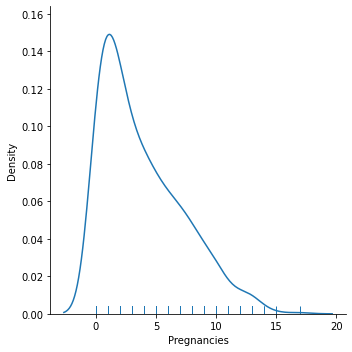

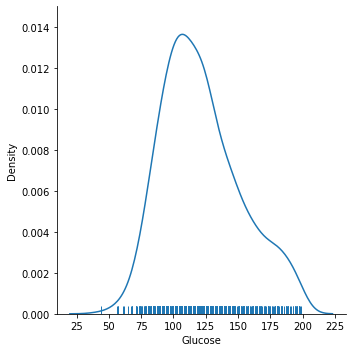

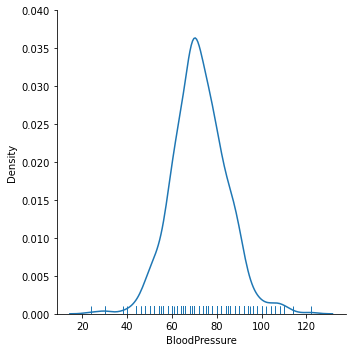

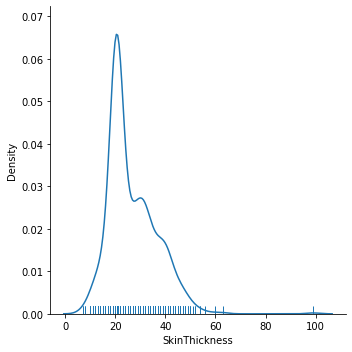

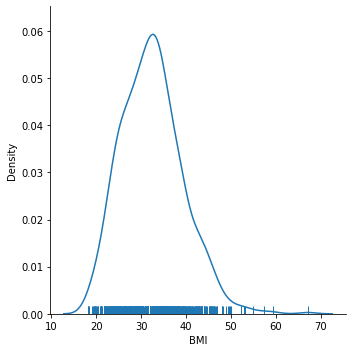

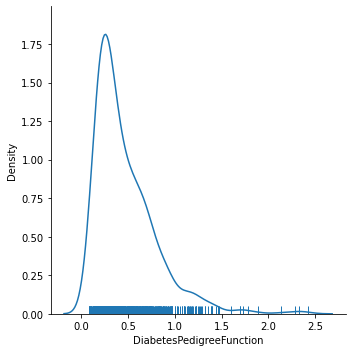

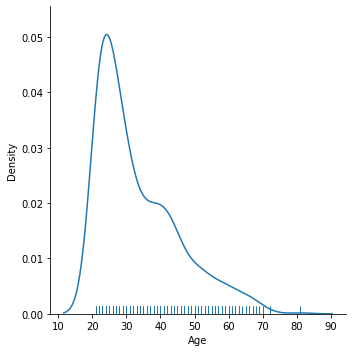

In [49]:
for i, col in enumerate(df.columns[:-1]):
    plt.figure(i)
    sbn.displot(df[col], kind="kde", rug=True)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

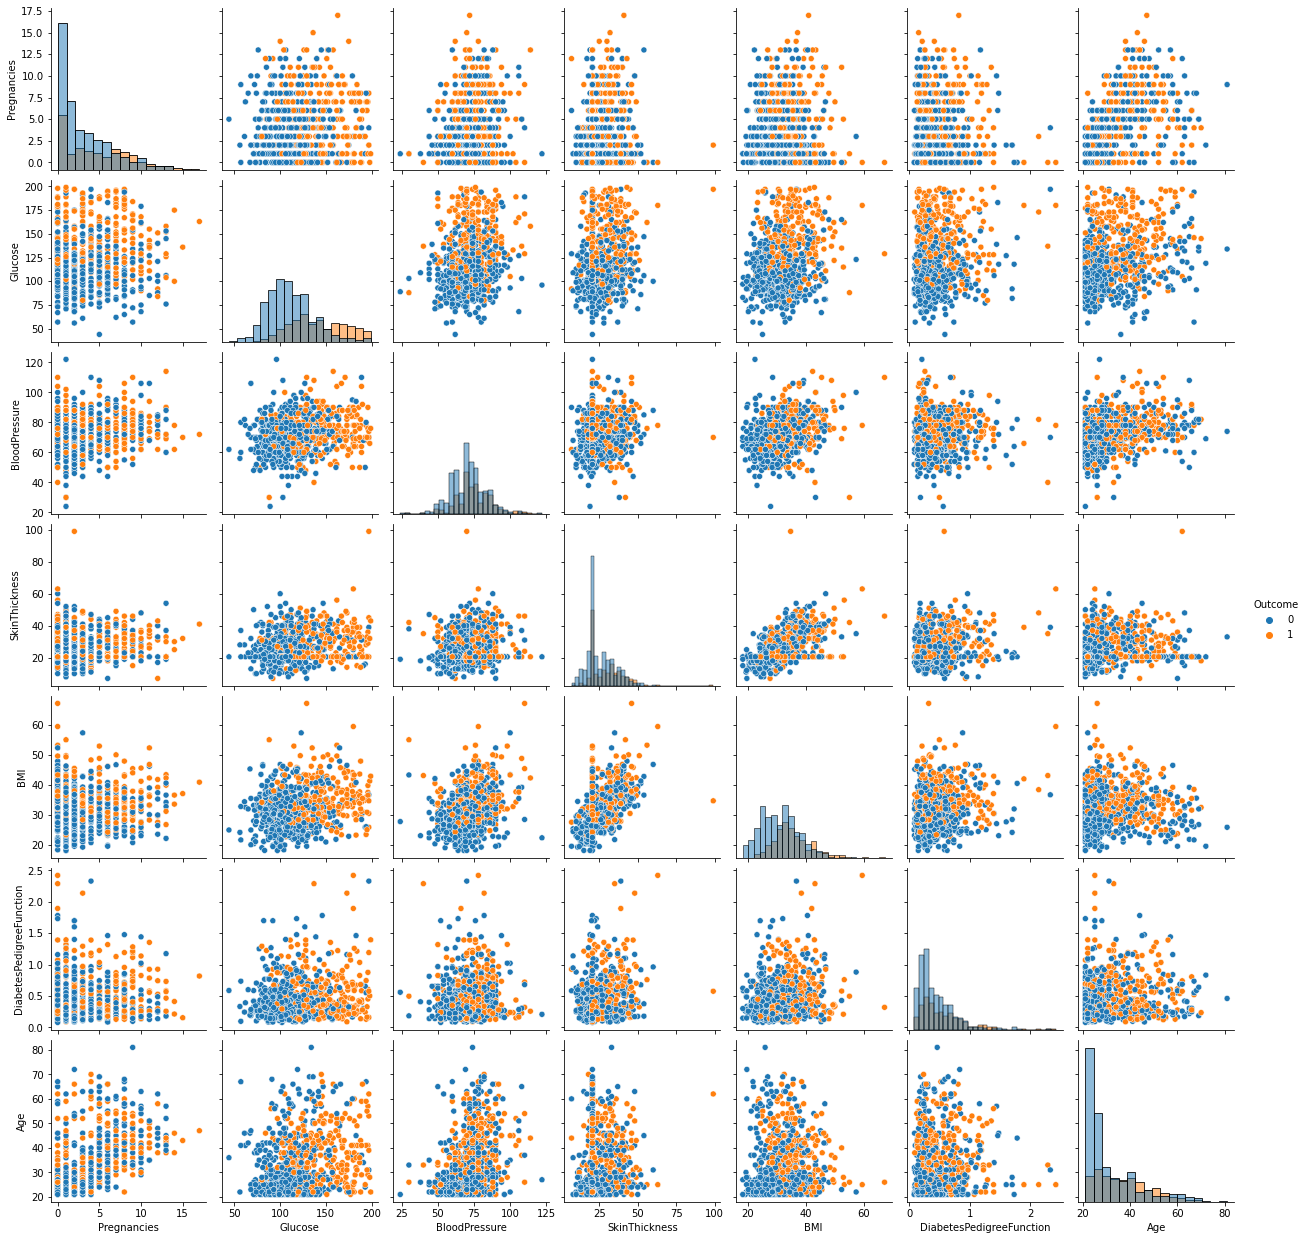

In [50]:
sbn.pairplot(df, hue='Outcome', diag_kind='hist')

In [51]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127964       0.208984       0.013376   
Glucose                      0.127964  1.000000       0.219666       0.160766   
BloodPressure                0.208984  0.219666       1.000000       0.134155   
SkinThickness                0.013376  0.160766       0.134155       1.000000   
BMI                          0.021546  0.231478       0.281231       0.535703   
DiabetesPedigreeFunction    -0.033523  0.137106       0.000371       0.154961   
Age                          0.544341  0.266600       0.326740       0.026423   
Outcome                      0.221898  0.492908       0.162986       0.175026   

                               BMI  DiabetesPedigreeFunction       Age  \
Pregnancies               0.021546                 -0.033523  0.544341   
Glucose                   0.231478                  0.137106  0.266600   
BloodPressure             0.281231                  0.000371  0.326740   
SkinThickness             0.535703                  0.154961  0.026423   
BMI                       1.000000                  0.153508  0.025748   
DiabetesPedigreeFunction  0.153508                  1.000000  0.033561   
Age                       0.025748                  0.033561  1.000000   
Outcome                   0.312254                  0.173844  0.238356   

                           Outcome  
Pregnancies               0.221898  
Glucose                   0.492908  
BloodPressure             0.162986  
SkinThickness             0.175026  
BMI                       0.312254  
DiabetesPedigreeFunction  0.173844  
Age                       0.238356  
Outcome                   1.000000

<AxesSubplot:>

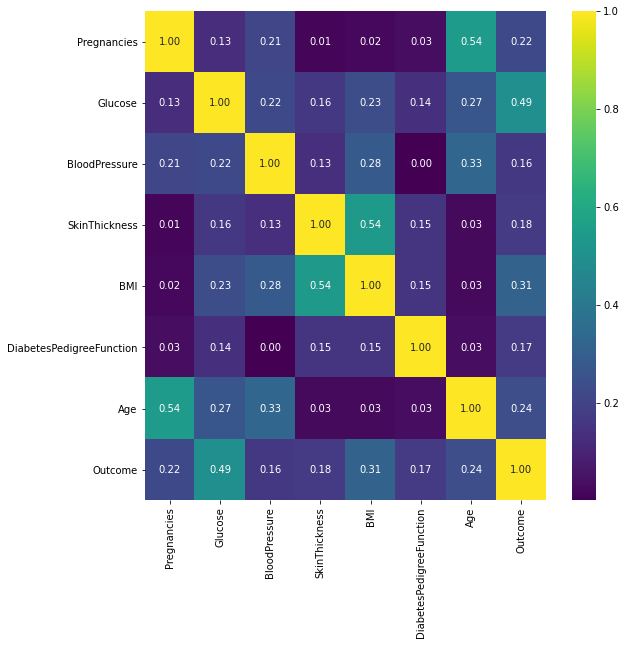

In [56]:
plt.figure(figsize=(9,9))
sbn.heatmap(np.abs(df.corr()), annot=True, cmap = 'viridis', fmt='0.2f')

In [54]:
df.cov()

Pregnancies     Glucose  BloodPressure  \
Pregnancies                 11.354056   13.123525       8.531879   
Glucose                     13.123525  926.351048      81.004072   
BloodPressure                8.531879   81.004072     146.795798   
SkinThickness                0.434104   47.126333      15.654757   
BMI                          0.499157   48.438745      23.426997   
DiabetesPedigreeFunction    -0.037426    1.382625       0.001490   
Age                         21.570620   95.425324      46.555963   
Outcome                      0.356618    7.155305       0.941851   

                          SkinThickness        BMI  DiabetesPedigreeFunction  \
Pregnancies                    0.434104   0.499157                 -0.037426   
Glucose                       47.126333  48.438745                  1.382625   
BloodPressure                 15.654757  23.426997                  0.001490   
SkinThickness                 92.760798  35.473414                  0.494498   
BMI                           35.473414  47.270761                  0.349692   
DiabetesPedigreeFunction       0.494498   0.349692                  0.109779   
Age                            2.992808   2.081889                  0.130772   
Outcome                        0.804005   1.023950                  0.027472   

                                 Age   Outcome  
Pregnancies                21.570620  0.356618  
Glucose                    95.425324  7.155305  
BloodPressure              46.555963  0.941851  
SkinThickness               2.992808  0.804005  
BMI                         2.081889  1.023950  
DiabetesPedigreeFunction    0.130772  0.027472  
Age                       138.303046  1.336953  
Outcome                     1.336953  0.227483

<AxesSubplot:>

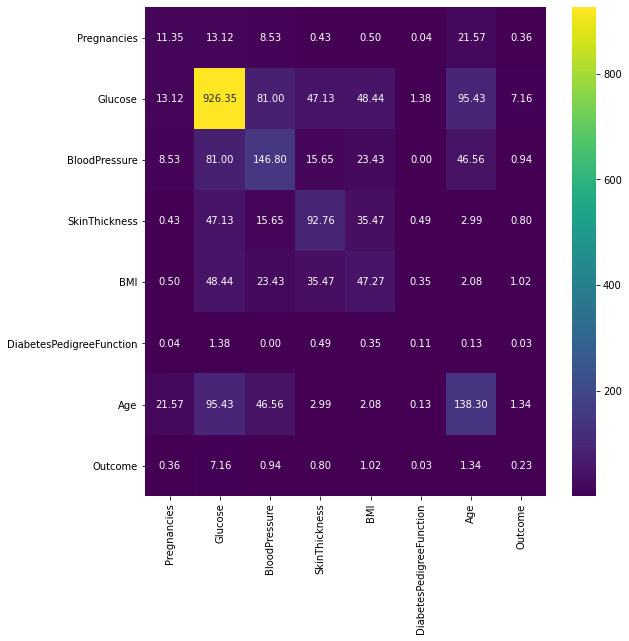

In [55]:
plt.figure(figsize=(9,9))
sbn.heatmap(np.abs(df.cov()), annot=True, cmap = 'viridis', fmt='0.2f')

In [58]:
df = df[['Glucose', 'BMI', 'Age', 'Outcome']]
df.head()

Glucose   BMI  Age  Outcome
0    148.0  33.6   50        1
1     85.0  26.6   31        0
2    183.0  23.3   32        1
3     89.0  28.1   21        0
4    137.0  43.1   33        1

In [63]:
X = df.drop( 'Outcome' ,axis=1)
y = df.Outcome

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [65]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train,y_train)

In [68]:
model.score(X_test,y_test)

0.7922077922077922

In [69]:
import pickle
with open('model_diabetes', 'wb') as f:
    pickle.dump(model, f)

In [70]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns ]
}
with open('columns_diabetes.json', 'w') as f:
    f.write(json.dumps(columns))
